<a href="https://colab.research.google.com/github/racoope70/daytrading-with-ml/blob/main/train_td3_multi_stock.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install stable-baselines3[extra] gymnasium gym-anytrading yfinance xgboost joblib tensorflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 172.2/172.2 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 34.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 25.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 38.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 52.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.5/184.5 kB 12.3 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-c

In [2]:
!pip uninstall -y dask cudf-cu12 cuml-cu12 rapids-dask-dependency pylibraft-cu12 pylibcudf-cu12 numba stable-baselines3 gymnasium gym-anytrading

Found existing installation: dask 2024.12.1
Uninstalling dask-2024.12.1:
  Successfully uninstalled dask-2024.12.1
Found existing installation: cudf-cu12 25.2.1
Uninstalling cudf-cu12-25.2.1:
  Successfully uninstalled cudf-cu12-25.2.1
Found existing installation: cuml-cu12 25.2.1
Uninstalling cuml-cu12-25.2.1:
  Successfully uninstalled cuml-cu12-25.2.1
Found existing installation: rapids-dask-dependency 25.2.0
Uninstalling rapids-dask-dependency-25.2.0:
  Successfully uninstalled rapids-dask-dependency-25.2.0
Found existing installation: pylibraft-cu12 25.2.0
Uninstalling pylibraft-cu12-25.2.0:
  Successfully uninstalled pylibraft-cu12-25.2.0
Found existing installation: pylibcudf-cu12 25.2.1
Uninstalling pylibcudf-cu12-25.2.1:
  Successfully uninstalled pylibcudf-cu12-25.2.1
Found existing installation: numba 0.60.0
Uninstalling numba-0.60.0:
  Successfully uninstalled numba-0.60.0
Found existing installation: stable_baselines3 2.6.0
Uninstalling stable_baselines3-2.6.0:
  Successfu

In [3]:
!pip install --upgrade --force-reinstall \
    dask==2024.11.2 \
    rapids-dask-dependency==24.12.0 \
    cudf-cu12==24.12.0 \
    cuml-cu12==24.12.0 \
    pylibraft-cu12==24.12.0 \
    pylibcudf-cu12==24.12.0 \
    numba==0.61.0 \
    stable-baselines3[extra] \
    gymnasium==0.29.1 \
    gym-anytrading==2.0.0


  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached gym_anytrading-2.0.0-py3-none-any.whl.metadata (292 bytes)
  Using cached stable_baselines3-2.6.0-py3-none-any.whl.metadata (4.8 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 3.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 4.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.2/42.2 kB 2.8 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 4.4 MB/s eta 

In [1]:
import cudf, cuml, dask, stable_baselines3, gymnasium
import numba, pandas, numpy, scipy

print("cuDF Version:", cudf.__version__)
print("cuML Version:", cuml.__version__)
print("Dask Version:", dask.__version__)
print("Stable Baselines3 Installed:", stable_baselines3.__version__)
print("Gymnasium Version:", gymnasium.__version__)
print("NumPy Version:", numpy.__version__)
print("SciPy Version:", scipy.__version__)
print("Pandas Version:", pandas.__version__)

/usr/local/lib/python3.11/dist-packages/cudf/utils/_ptxcompiler.py:64: UserWarning: Error getting driver and runtime versions:

stdout:



stderr:

Traceback (most recent call last):
  File "<string>", line 4, in <module>
  File "/usr/local/lib/python3.11/dist-packages/numba_cuda/numba/cuda/cudadrv/driver.py", line 272, in __getattr__
    raise CudaSupportError("Error at driver init: \n%s:" %
numba.cuda.cudadrv.error.CudaSupportError: Error at driver init: 

CUDA driver library cannot be found.
If you are sure that a CUDA driver is installed,
try setting environment variable NUMBA_CUDA_DRIVER
with the file path of the CUDA driver shared library.
:


Not patching Numba
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.11/dist-packages/cudf/utils/gpu_utils.py:62: UserWarning: Failed to dlopen libcuda.so.1
  warnings.warn(str(e))


AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

cuDF Version: 24.12.00
cuML Version: 24.12.00
Dask Version: 2024.11.2
Stable Baselines3 Installed: 2.6.0
Gymnasium Version: 0.29.1
NumPy Version: 2.1.3
SciPy Version: 1.15.2
Pandas Version: 2.2.3


In [2]:
!nvidia-smi

/bin/bash: line 1: nvidia-smi: command not found


In [3]:
import tensorflow as tf
print("TF Version:", tf.__version__)
print("Available GPUs:", tf.config.list_physical_devices('GPU'))

TF Version: 2.18.0
Available GPUs: []


In [4]:
#Step 2: Set Environment Paths for CUDA 11.8
import os
os.environ['CUDA_HOME'] = '/usr/local/cuda-11.8'
os.environ['PATH'] += ':/usr/local/cuda-11.8/bin'
os.environ['LD_LIBRARY_PATH'] += ':/usr/local/cuda-11.8/lib64'

In [5]:

try:
    df = cudf.DataFrame({'col1': [1, 2, 3], 'col2': [4, 5, 6]})
    print("cuDF is working and using GPU!")
except Exception as e:
    print(f"cuDF GPU check failed: {e}")



cuDF GPU check failed: Function "cuInit" not found


In [6]:
import os
import time
import gc
import numpy as np
import pandas as pd
import xgboost as xgb
import yfinance as yf
import gymnasium as gym  #Use gymnasium instead of gym
import gym_anytrading
from gymnasium.envs.registration import registry, register
import matplotlib.pyplot as plt

#Prevent cuDF from taking all GPU memory
os.environ["RAPIDS_NO_INITIALIZE"] = "1"

#RAPIDS & GPU-based Libraries (Try-Except to Avoid CPU Errors)
try:
    import cudf
    import cuml
    from cuml.ensemble import RandomForestClassifier
    from cuml.metrics import accuracy_score
    GPU_AVAILABLE = True
    print("cuDF & cuML are available and running on GPU.")
except ImportError:
    print("cuDF/cuML not available. Switching to CPU mode.")
    GPU_AVAILABLE = False

#Reinforcement Learning & Trading
from stable_baselines3 import PPO
from stable_baselines3.common.vec_env import DummyVecEnv

#Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

#TensorFlow & GPU Optimization
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

#Ensure TensorFlow GPU Memory Allocation is Configured
gpus = tf.config.list_physical_devices("GPU")
if gpus:
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)  #Prevents full allocation
        print("TensorFlow GPU memory growth enabled")
    except RuntimeError as e:
        print(f"TensorFlow GPU memory issue: {e}")

#Google Drive Access (for Colab)
from google.colab import drive


cuDF & cuML are available and running on GPU.


In [7]:
import os
import time
import numpy as np
import pandas as pd
import yfinance as yf

#Ticker List
ticker_list = [
    'AAPL', 'TSLA', 'MSFT', 'GOOGL', 'AMZN', 'NVDA', 'META', 'BRK-B', 'JPM', 'JNJ',
    'XOM', 'V', 'PG', 'UNH', 'MA', 'HD', 'LLY', 'MRK', 'PEP', 'KO',
    'BAC', 'ABBV', 'AVGO', 'PFE', 'COST', 'CSCO', 'TMO', 'ABT', 'ACN', 'WMT',
    'MCD', 'ADBE', 'DHR', 'CRM', 'NKE', 'INTC', 'QCOM', 'NEE', 'AMD', 'TXN',
    'AMGN', 'UPS', 'LIN', 'PM', 'UNP', 'BMY', 'LOW', 'RTX', 'CVX', 'IBM',
    'GE', 'SBUX', 'ORCL'
]

CONFIG = {
    'period': '720d',
    'interval': '1h',
    'strategy_name': "sac_ppo_td3_multi_stock_v1"
}

#1.Download Stock Data
def download_stock_data(ticker, period="720d", interval="1h", max_retries=5):
    for attempt in range(1, max_retries + 1):
        try:
            print(f"Attempt {attempt}: Downloading {ticker}...")
            df = yf.download(ticker, period=period, interval=interval)
            if not df.empty:
                df.reset_index(inplace=True)
                df['Symbol'] = ticker
                return df
            raise ValueError("Empty data")
        except Exception as e:
            print(f"Error: {e}. Retrying in {attempt * 5} sec...")
            time.sleep(attempt * 5)
    print(f"Failed to download {ticker}")
    return None

#2.Feature Engineering
def compute_enhanced_features(df):
    df = df.copy()
    if isinstance(df.columns, pd.MultiIndex):
        df.columns = df.columns.get_level_values(0)
    df = df.loc[:, ~df.columns.duplicated()]

    df['SMA_20'] = df['Close'].rolling(20).mean()
    df['STD_20'] = df['Close'].rolling(20).std()
    df['Upper_Band'] = df['SMA_20'] + 2 * df['STD_20']
    df['Lower_Band'] = df['SMA_20'] - 2 * df['STD_20']
    df['Lowest_Low'] = df['Low'].rolling(14).min()
    df['Highest_High'] = df['High'].rolling(14).max()
    denom = (df['Highest_High'] - df['Lowest_Low']).replace(0, np.nan)
    df['Stoch'] = ((df['Close'] - df['Lowest_Low']) / denom) * 100
    df['ROC'] = df['Close'].pct_change(10)
    df['OBV'] = (np.sign(df['Close'].diff()) * df['Volume']).cumsum()
    typical_price = (df['High'] + df['Low'] + df['Close']) / 3
    df['CCI'] = (typical_price - typical_price.rolling(20).mean()) / (0.015 * typical_price.rolling(20).std())
    df['PROC'] = ((df['Close'] - df['Close'].shift(12)) / df['Close'].shift(12)) * 100
    df['Rolling_Mean_50'] = df['Close'].rolling(50).mean()
    df['Expanding_Mean'] = df['Close'].expanding().mean()
    df['EMA_10'] = df['Close'].ewm(span=10).mean()
    df['EMA_50'] = df['Close'].ewm(span=50).mean()
    df['MACD_Line'] = df['Close'].ewm(span=12).mean() - df['Close'].ewm(span=26).mean()
    df['MACD_Signal'] = df['MACD_Line'].ewm(span=9).mean()
    df['MACD_Hist'] = df['MACD_Line'] - df['MACD_Signal']
    delta = df['Close'].diff()
    gain = delta.where(delta > 0, 0).rolling(14).mean()
    loss = -delta.where(delta < 0, 0).rolling(14).mean()
    rs = gain / loss
    df['RSI'] = 100 - (100 / (1 + rs))
    df['True_Range'] = df[['High', 'Low', 'Close']].apply(
        lambda x: max(x.iloc[0] - x.iloc[1], abs(x.iloc[0] - x.iloc[2]), abs(x.iloc[1] - x.iloc[2])), axis=1)
    df['ATR'] = df['True_Range'].rolling(14).mean()
    df['+DM'] = np.where((df['High'].diff() > df['Low'].diff()) & (df['High'].diff() > 0), df['High'].diff(), 0)
    df['-DM'] = np.where((df['Low'].diff() > df['High'].diff()) & (df['Low'].diff() > 0), df['Low'].diff(), 0)
    df['+DI'] = 100 * df['+DM'].rolling(14).mean() / df['ATR']
    df['-DI'] = 100 * df['-DM'].rolling(14).mean() / df['ATR']
    df['ADX'] = abs(df['+DI'] - df['-DI']).rolling(14).mean()
    df['Volume_Avg'] = df['Volume'].rolling(20).mean()
    df['Volume_Change'] = df['Volume'].pct_change()
    df['Volume_Change_MA'] = df['Volume_Change'].rolling(10).mean()
    df['Volume_Change_Ratio'] = df['Volume_Change'] / df['Volume_Change'].shift(1)
    df['Relative_Volume'] = df['Volume'] / df['Volume_Avg']
    df['Trailing_Stop'] = np.minimum(df['Close'] * 0.985, df['Close'] - (df['ATR'] * 0.3))
    df.replace([np.inf, -np.inf], np.nan, inplace=True)
    df.dropna(inplace=True)
    return df

#3.Label Creation
def create_trading_labels(df, label_type="multiclass", return_threshold=0.02, shift_period=10):
    df = df.copy()
    df['Future_Close'] = df['Close'].shift(-shift_period)
    df['Return'] = (df['Future_Close'] - df['Close']) / df['Close']

    if label_type == "multiclass":
        df['Target'] = np.select(
            [df['Return'] > return_threshold, df['Return'] < -return_threshold],
            [1, -1],
            default=0
        )
    elif label_type == "binary":
        df['Target'] = np.where(df['Return'] > return_threshold, 1, 0)
    elif label_type == "regression":
        df['Target'] = df['Return']
    else:
        raise ValueError("Invalid label_type. Use 'multiclass', 'binary', or 'regression'.")

    df.drop(columns=["Future_Close", "Return"], inplace=True, errors='ignore')
    return df

#4.Run Pipeline for All Stocks
all_dfs = []

for ticker in ticker_list:
    df_single = download_stock_data(ticker, period=CONFIG['period'], interval=CONFIG['interval'])
    if df_single is not None:
        try:
            df_features = compute_enhanced_features(df_single)
            df_labeled = create_trading_labels(df_features, label_type="multiclass")
            all_dfs.append(df_labeled)
        except Exception as e:
            print(f"Feature engineering or labeling failed for {ticker}: {e}")
    else:
        print(f"Failed to download {ticker}")

#5. Combine & Save
if all_dfs:
    df = pd.concat(all_dfs, ignore_index=True)
    print(f"Combined dataset created with shape: {df.shape}")
    df.to_csv("multi_stock_feature_engineered_dataset.csv", index=False)
    print("Saved locally as multi_stock_feature_engineered_dataset.csv")

    #Google Drive path (optional)
    drive_path = "/content/drive/MyDrive/trading_data/"
    os.makedirs(drive_path, exist_ok=True)
    df.to_csv(os.path.join(drive_path, "multi_stock_feature_engineered_dataset.csv"), index=False)
    print(f"Also saved to: {drive_path}multi_stock_feature_engineered_dataset.csv")
else:
    print("No data was processed.")


Attempt 1: Downloading AAPL...
YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


Attempt 1: Downloading TSLA...


[*********************100%***********************]  1 of 1 completed


Attempt 1: Downloading MSFT...


[*********************100%***********************]  1 of 1 completed


Attempt 1: Downloading GOOGL...


[*********************100%***********************]  1 of 1 completed


Attempt 1: Downloading AMZN...


[*********************100%***********************]  1 of 1 completed


Attempt 1: Downloading NVDA...


[*********************100%***********************]  1 of 1 completed


Attempt 1: Downloading META...


[*********************100%***********************]  1 of 1 completed


Attempt 1: Downloading BRK-B...


[*********************100%***********************]  1 of 1 completed


Attempt 1: Downloading JPM...


[*********************100%***********************]  1 of 1 completed


Attempt 1: Downloading JNJ...


[*********************100%***********************]  1 of 1 completed


Attempt 1: Downloading XOM...


[*********************100%***********************]  1 of 1 completed


Attempt 1: Downloading V...


[*********************100%***********************]  1 of 1 completed


Attempt 1: Downloading PG...


[*********************100%***********************]  1 of 1 completed


Attempt 1: Downloading UNH...


[*********************100%***********************]  1 of 1 completed


Attempt 1: Downloading MA...


[*********************100%***********************]  1 of 1 completed


Attempt 1: Downloading HD...


[*********************100%***********************]  1 of 1 completed


Attempt 1: Downloading LLY...


[*********************100%***********************]  1 of 1 completed


Attempt 1: Downloading MRK...


[*********************100%***********************]  1 of 1 completed


Attempt 1: Downloading PEP...


[*********************100%***********************]  1 of 1 completed


Attempt 1: Downloading KO...


[*********************100%***********************]  1 of 1 completed


Attempt 1: Downloading BAC...


[*********************100%***********************]  1 of 1 completed


Attempt 1: Downloading ABBV...


[*********************100%***********************]  1 of 1 completed


Attempt 1: Downloading AVGO...


[*********************100%***********************]  1 of 1 completed


Attempt 1: Downloading PFE...


[*********************100%***********************]  1 of 1 completed


Attempt 1: Downloading COST...


[*********************100%***********************]  1 of 1 completed


Attempt 1: Downloading CSCO...


[*********************100%***********************]  1 of 1 completed


Attempt 1: Downloading TMO...


[*********************100%***********************]  1 of 1 completed


Attempt 1: Downloading ABT...


[*********************100%***********************]  1 of 1 completed


Attempt 1: Downloading ACN...


[*********************100%***********************]  1 of 1 completed


Attempt 1: Downloading WMT...


[*********************100%***********************]  1 of 1 completed


Attempt 1: Downloading MCD...


[*********************100%***********************]  1 of 1 completed


Attempt 1: Downloading ADBE...


[*********************100%***********************]  1 of 1 completed


Attempt 1: Downloading DHR...


[*********************100%***********************]  1 of 1 completed


Attempt 1: Downloading CRM...


[*********************100%***********************]  1 of 1 completed


Attempt 1: Downloading NKE...


[*********************100%***********************]  1 of 1 completed


Attempt 1: Downloading INTC...


[*********************100%***********************]  1 of 1 completed


Attempt 1: Downloading QCOM...


[*********************100%***********************]  1 of 1 completed


Attempt 1: Downloading NEE...


[*********************100%***********************]  1 of 1 completed


Attempt 1: Downloading AMD...


[*********************100%***********************]  1 of 1 completed


Attempt 1: Downloading TXN...


[*********************100%***********************]  1 of 1 completed


Attempt 1: Downloading AMGN...


[*********************100%***********************]  1 of 1 completed


Attempt 1: Downloading UPS...


[*********************100%***********************]  1 of 1 completed


Attempt 1: Downloading LIN...


[*********************100%***********************]  1 of 1 completed


Attempt 1: Downloading PM...


[*********************100%***********************]  1 of 1 completed


Attempt 1: Downloading UNP...


[*********************100%***********************]  1 of 1 completed


Attempt 1: Downloading BMY...


[*********************100%***********************]  1 of 1 completed


Attempt 1: Downloading LOW...


[*********************100%***********************]  1 of 1 completed


Attempt 1: Downloading RTX...


[*********************100%***********************]  1 of 1 completed


Attempt 1: Downloading CVX...


[*********************100%***********************]  1 of 1 completed


Attempt 1: Downloading IBM...


[*********************100%***********************]  1 of 1 completed


Attempt 1: Downloading GE...


[*********************100%***********************]  1 of 1 completed


Attempt 1: Downloading SBUX...


[*********************100%***********************]  1 of 1 completed


Attempt 1: Downloading ORCL...


[*********************100%***********************]  1 of 1 completed


Combined dataset created with shape: (262805, 40)
Saved locally as multi_stock_feature_engineered_dataset.csv
Also saved to: /content/drive/MyDrive/trading_data/multi_stock_feature_engineered_dataset.csv


In [8]:
#Ensure Column Names Are Flattened Correctly
df.columns = df.columns.get_level_values(0) if isinstance(df.columns, pd.MultiIndex) else df.columns

#Remove Named Index (if exists)
df.columns.name = None  #Remove 'Price' as the column index name

#Verify Columns After Processing
print("Final Columns in df:", df.columns)

#Ensure 'Close' Exists Before Proceeding
if 'Close' not in df.columns:
    raise KeyError("Column 'Close' not found in the DataFrame after processing.")

#Load Your Dataset
data = df.copy()  #Ensure 'df' is loaded before this step

#Add Technical Indicators (RSI & MACD)
def compute_rsi(data, window=14):
    delta = data['Close'].diff(1)
    gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()
    rs = gain / loss
    rsi = 100 - (100 / (1 + rs))  #Compute RSI
    return rsi  #Return computed RSI values

def compute_macd(data, short=12, long=26, signal=9):
    short_ema = data['Close'].ewm(span=short, adjust=False).mean()
    long_ema = data['Close'].ewm(span=long, adjust=False).mean()
    data['MACD'] = short_ema - long_ema
    data['MACD_Signal'] = data['MACD'].ewm(span=signal, adjust=False).mean()

#aaply Indicators to `data`
data['RSI'] = compute_rsi(data)  #Ensure RSI is assigned properly
compute_macd(data)  #Compute MACD in place

#Drop NaN values to avoid errors in training
data.dropna(inplace=True)

#Verify if 'RSI' column exists
print(data.head())  #Print first few rows to check if RSI is present

#Drop non-numeric columns before normalization (keep index intact)
data_numeric = data.select_dtypes(include=[np.number])  #Keep only numeric columns

#Normalize only numeric data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data_numeric)

#Convert back to DataFrame and retain the original index
scaled_df = pd.DataFrame(scaled_data, columns=data_numeric.columns, index=data.index)

#Check if the data looks correct
print(scaled_df.head())


Final Columns in df: Index(['Datetime', 'Close', 'High', 'Low', 'Open', 'Volume', 'Symbol',
       'SMA_20', 'STD_20', 'Upper_Band', 'Lower_Band', 'Lowest_Low',
       'Highest_High', 'Stoch', 'ROC', 'OBV', 'CCI', 'PROC', 'Rolling_Mean_50',
       'Expanding_Mean', 'EMA_10', 'EMA_50', 'MACD_Line', 'MACD_Signal',
       'MACD_Hist', 'RSI', 'True_Range', 'ATR', '+DM', '-DM', '+DI', '-DI',
       'ADX', 'Volume_Avg', 'Volume_Change', 'Volume_Change_MA',
       'Volume_Change_Ratio', 'Relative_Volume', 'Trailing_Stop', 'Target'],
      dtype='object')
                    Datetime       Close        High         Low        Open  \
13 2022-06-09 19:30:00+00:00  142.600006  143.800003  142.529999  143.619995   
14 2022-06-10 13:30:00+00:00  137.490005  140.759995  137.460007  140.250000   
15 2022-06-10 14:30:00+00:00  137.399994  138.539001  137.270004  137.489899   
16 2022-06-10 15:30:00+00:00  137.975006  138.070007  137.289993  137.410995   
17 2022-06-10 16:30:00+00:00  138.089996  138.

In [13]:
#Optimized Multi-Stock TD3 Trading Pipeline (Faster Version)
import os
import gc
import time
import json
import torch
import numpy as np
import pandas as pd
import yfinance as yf
import gym_anytrading
from gym_anytrading.envs.stocks_env import StocksEnv
from datetime import datetime
from stable_baselines3 import TD3
from stable_baselines3.common.vec_env import DummyVecEnv
from stable_baselines3.common.noise import NormalActionNoise
from gymnasium.spaces import Box
import matplotlib.pyplot as plt

#=== CONFIG ===
tickers = [
    'AAPL', 'TSLA', 'MSFT', 'GOOGL', 'AMZN', 'NVDA', 'META', 'BRK-B', 'JPM', 'JNJ',
    'XOM', 'V', 'PG', 'UNH', 'MA', 'HD', 'LLY', 'MRK', 'PEP', 'KO', 'BAC', 'ABBV', 'AVGO', 'PFE',
    'COST', 'CSCO', 'TMO', 'ABT', 'ACN', 'WMT', 'MCD', 'ADBE', 'DHR', 'CRM', 'NKE', 'INTC',
    'QCOM', 'NEE', 'AMD', 'TXN', 'AMGN', 'UPS', 'LIN', 'PM', 'UNP', 'BMY', 'LOW', 'RTX', 'CVX',
    'IBM', 'GE', 'SBUX', 'ORCL'
]
window_size = 10
initial_balance = 100000
results = []
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
torch.backends.cudnn.benchmark = True  #GPU SPEED BOOST

#=== Functions ===
def clean_stock_data(df):
    if isinstance(df.columns, pd.MultiIndex):
        df.columns = df.columns.get_level_values(0)
    df.rename(columns=lambda x: x.capitalize(), inplace=True)
    df.rename(columns={'Adj Close': 'Close'}, inplace=True)
    df['Datetime'] = pd.to_datetime(df['Datetime'], errors='coerce')
    df.dropna(subset=['Datetime', 'Close'], inplace=True)
    df.sort_values(by='Datetime', inplace=True)
    df.reset_index(drop=True, inplace=True)
    return df

def compute_technical_indicators(df):
    df['ATR'] = (df['High'] - df['Low']).rolling(window=14).mean()
    df['EMA_10'] = df['Close'].ewm(span=10).mean()
    df['EMA_50'] = df['Close'].ewm(span=50).mean()
    df['SMA_20'] = df['Close'].rolling(window=20).mean()
    df['SMA_50'] = df['Close'].rolling(window=50).mean()
    macd_fast = df['Close'].ewm(span=12).mean()
    macd_slow = df['Close'].ewm(span=26).mean()
    df['MACD_Line'] = macd_fast - macd_slow
    df['MACD_Signal'] = df['MACD_Line'].ewm(span=9).mean()
    df['MACD_Hist'] = df['MACD_Line'] - df['MACD_Signal']
    delta = df['Close'].diff()
    gain = delta.clip(lower=0).rolling(window=14).mean()
    loss = -delta.clip(upper=0).rolling(window=14).mean()
    rs = gain / loss
    df['RSI'] = 100 - (100 / (1 + rs))
    df['Volume_Avg'] = df['Volume'].rolling(window=20).mean()
    df['ADX'] = abs(df['High'] - df['Low']).rolling(window=14).mean()
    df.dropna(inplace=True)
    return df

class ContinuousTradingEnv(StocksEnv):
    def __init__(self, df, frame_bound, window_size):
        super().__init__(df=df, frame_bound=frame_bound, window_size=window_size)
        self.action_space = Box(low=-1.0, high=1.0, shape=(1,), dtype=np.float32)

    def step(self, action):
        if isinstance(action, np.ndarray):
            action = action[0]
        if action < -0.3:
            discrete_action = 0  #SELL
        elif action > 0.3:
            discrete_action = 1  #BUY
        else:
            discrete_action = 2  #HOLD
        return super().step(discrete_action)

#=== MAIN LOOP ===
for ticker in tickers:
    print(f"\nRunning TD3 for: {ticker}")
    try:
        df_live = yf.download(ticker, period="720d", interval="1h")
        if df_live.empty:
            raise ValueError("Empty data")

        df_live.reset_index(inplace=True)
        df = clean_stock_data(df_live)
        df = compute_technical_indicators(df)
        frame_bound = (50, len(df))

        env = DummyVecEnv([lambda: ContinuousTradingEnv(df, frame_bound, window_size)])

        n_actions = env.action_space.shape[-1]
        action_noise = NormalActionNoise(mean=np.zeros(n_actions), sigma=0.1 * np.ones(n_actions))

        model = TD3(
            "MlpPolicy",
            env,
            learning_rate=2e-4,  #Faster learning
            buffer_size=100000,
            batch_size=128,  #Smaller batch for faster updates
            gamma=0.99,
            policy_delay=2,
            verbose=0,
            device=device,
            action_noise=action_noise
        )

        model.learn(total_timesteps=5000)  #Reduced from 10000

        obs = env.reset()
        trade_log = []
        buy_price = None
        portfolio = []
        balance = initial_balance
        position = 0

        for i in range(len(df) - 50):
            action, _ = model.predict(obs)
            price = df['Close'].iloc[i + 50]
            if action > 0.3 and buy_price is None:
                trade_log.append("BUY")
                buy_price = price
                position = balance / price
                balance = 0
            elif action < -0.3 and buy_price is not None:
                trade_log.append("SELL")
                balance = position * price
                position = 0
                buy_price = None
            else:
                trade_log.append("HOLD")
            value = balance if balance > 0 else position * price
            portfolio.append(value)

        final_value = portfolio[-1]
        buy_hold = (initial_balance / df['Close'].iloc[50]) * df['Close'].iloc[-1]
        cumulative_return = ((final_value / initial_balance) - 1) * 100
        daily_returns = pd.Series(portfolio).pct_change().fillna(0)
        sharpe = (daily_returns.mean() / daily_returns.std()) * np.sqrt(252) if daily_returns.std() != 0 else 0
        max_dd = (pd.Series(portfolio).cummax() - pd.Series(portfolio)).max() / pd.Series(portfolio).cummax().max() * 100

        results.append({
            "Ticker": ticker,
            "TD3 Final": round(final_value, 2),
            "BuyHold Final": round(buy_hold, 2),
            "Return %": round(cumulative_return, 2),
            "Sharpe": round(sharpe, 2),
            "Max DD %": round(max_dd, 2),
            "Winner": "TD3" if final_value > buy_hold else "Buy & Hold"
        })

        if len(results) % 5 == 0:
            pd.DataFrame(results).to_csv("td3_partial_results.csv", index=False)

        del model, env
        gc.collect()
        torch.cuda.empty_cache()

    except Exception as e:
        print(f"Error with {ticker}: {e}")
        continue

#=== SAVE RESULTS ===
results_df = pd.DataFrame(results)
results_df.to_csv("td3_multi_stock_results.csv", index=False)
print("\nTD3 multi-stock trading complete. Results saved.")
print(results_df.sort_values(by="Return %", ascending=False).head())


Running TD3 for: AAPL


[*********************100%***********************]  1 of 1 completed



Running TD3 for: TSLA


[*********************100%***********************]  1 of 1 completed



Running TD3 for: MSFT


[*********************100%***********************]  1 of 1 completed



Running TD3 for: GOOGL


[*********************100%***********************]  1 of 1 completed



Running TD3 for: AMZN


[*********************100%***********************]  1 of 1 completed



Running TD3 for: NVDA


[*********************100%***********************]  1 of 1 completed



Running TD3 for: META


[*********************100%***********************]  1 of 1 completed



Running TD3 for: BRK-B


[*********************100%***********************]  1 of 1 completed



Running TD3 for: JPM


[*********************100%***********************]  1 of 1 completed



Running TD3 for: JNJ


[*********************100%***********************]  1 of 1 completed



Running TD3 for: XOM


[*********************100%***********************]  1 of 1 completed



Running TD3 for: V


[*********************100%***********************]  1 of 1 completed



Running TD3 for: PG


[*********************100%***********************]  1 of 1 completed



Running TD3 for: UNH


[*********************100%***********************]  1 of 1 completed



Running TD3 for: MA


[*********************100%***********************]  1 of 1 completed



Running TD3 for: HD


[*********************100%***********************]  1 of 1 completed



Running TD3 for: LLY


[*********************100%***********************]  1 of 1 completed



Running TD3 for: MRK


[*********************100%***********************]  1 of 1 completed



Running TD3 for: PEP


[*********************100%***********************]  1 of 1 completed



Running TD3 for: KO


[*********************100%***********************]  1 of 1 completed



Running TD3 for: BAC


[*********************100%***********************]  1 of 1 completed



Running TD3 for: ABBV


[*********************100%***********************]  1 of 1 completed



Running TD3 for: AVGO


[*********************100%***********************]  1 of 1 completed



Running TD3 for: PFE


[*********************100%***********************]  1 of 1 completed



Running TD3 for: COST


[*********************100%***********************]  1 of 1 completed



Running TD3 for: CSCO


[*********************100%***********************]  1 of 1 completed



Running TD3 for: TMO


[*********************100%***********************]  1 of 1 completed



Running TD3 for: ABT


[*********************100%***********************]  1 of 1 completed



Running TD3 for: ACN


[*********************100%***********************]  1 of 1 completed



Running TD3 for: WMT


[*********************100%***********************]  1 of 1 completed



Running TD3 for: MCD


[*********************100%***********************]  1 of 1 completed



Running TD3 for: ADBE


[*********************100%***********************]  1 of 1 completed



Running TD3 for: DHR


[*********************100%***********************]  1 of 1 completed



Running TD3 for: CRM


[*********************100%***********************]  1 of 1 completed



Running TD3 for: NKE


[*********************100%***********************]  1 of 1 completed



Running TD3 for: INTC


[*********************100%***********************]  1 of 1 completed



Running TD3 for: QCOM


[*********************100%***********************]  1 of 1 completed



Running TD3 for: NEE


[*********************100%***********************]  1 of 1 completed



Running TD3 for: AMD


[*********************100%***********************]  1 of 1 completed



Running TD3 for: TXN


[*********************100%***********************]  1 of 1 completed



Running TD3 for: AMGN


[*********************100%***********************]  1 of 1 completed



Running TD3 for: UPS


[*********************100%***********************]  1 of 1 completed



Running TD3 for: LIN


[*********************100%***********************]  1 of 1 completed



Running TD3 for: PM


[*********************100%***********************]  1 of 1 completed



Running TD3 for: UNP


[*********************100%***********************]  1 of 1 completed



Running TD3 for: BMY


[*********************100%***********************]  1 of 1 completed



Running TD3 for: LOW


[*********************100%***********************]  1 of 1 completed



Running TD3 for: RTX


[*********************100%***********************]  1 of 1 completed



Running TD3 for: CVX


[*********************100%***********************]  1 of 1 completed



Running TD3 for: IBM


[*********************100%***********************]  1 of 1 completed



Running TD3 for: GE


[*********************100%***********************]  1 of 1 completed



Running TD3 for: SBUX


[*********************100%***********************]  1 of 1 completed



Running TD3 for: ORCL


[*********************100%***********************]  1 of 1 completed



TD3 multi-stock trading complete. Results saved.
   Ticker  TD3 Final  BuyHold Final  Return %  Sharpe  Max DD %      Winner
16    LLY  244900.94      244900.94    144.90    0.44     28.27  Buy & Hold
24   COST  215153.84      215153.84    115.15    0.52     17.52  Buy & Hold
8     JPM  200973.36      200973.36    100.97    0.42     25.33  Buy & Hold
52   ORCL  194711.27      194711.27     94.71    0.33     36.58  Buy & Hold
7   BRK-B  191947.54      191947.54     91.95    0.53     11.02  Buy & Hold


In [14]:
gc.collect

<function gc.collect(generation=2)>

In [15]:
results_df = pd.DataFrame(results)
results_df.to_csv("td3_multi_stock_results.csv", index=False)



TD3 Summary Stats
           TD3 Final  BuyHold Final    Return %     Sharpe   Max DD %
count      53.000000      53.000000   53.000000  53.000000  53.000000
mean   116499.579245  151836.625094   16.499245   0.089811  15.988679
std     38015.749577  104263.880328   38.015631   0.174846  18.202478
min     46201.580000   46201.580000  -53.800000  -0.380000   0.000000
25%    100000.000000  103435.630000    0.000000   0.000000   0.000000
50%    100000.000000  126210.140000    0.000000   0.000000  15.270000
75%    126984.310000  161307.220000   26.980000   0.190000  28.270000
max    244900.940000  684297.850000  144.900000   0.530000  61.350000

Top 10 TD3 Stocks by Return %
   Ticker  Return %  Sharpe  Max DD %      Winner
16    LLY    144.90    0.44     28.27  Buy & Hold
24   COST    115.15    0.52     17.52  Buy & Hold
8     JPM    100.97    0.42     25.33  Buy & Hold
52   ORCL     94.71    0.33     36.58  Buy & Hold
7   BRK-B     91.95    0.53     11.02  Buy & Hold
11      V     72.48 

<ipython-input-18-a102520a4bad>:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=td3_results, x="Ticker", y="Return %", palette="viridis")


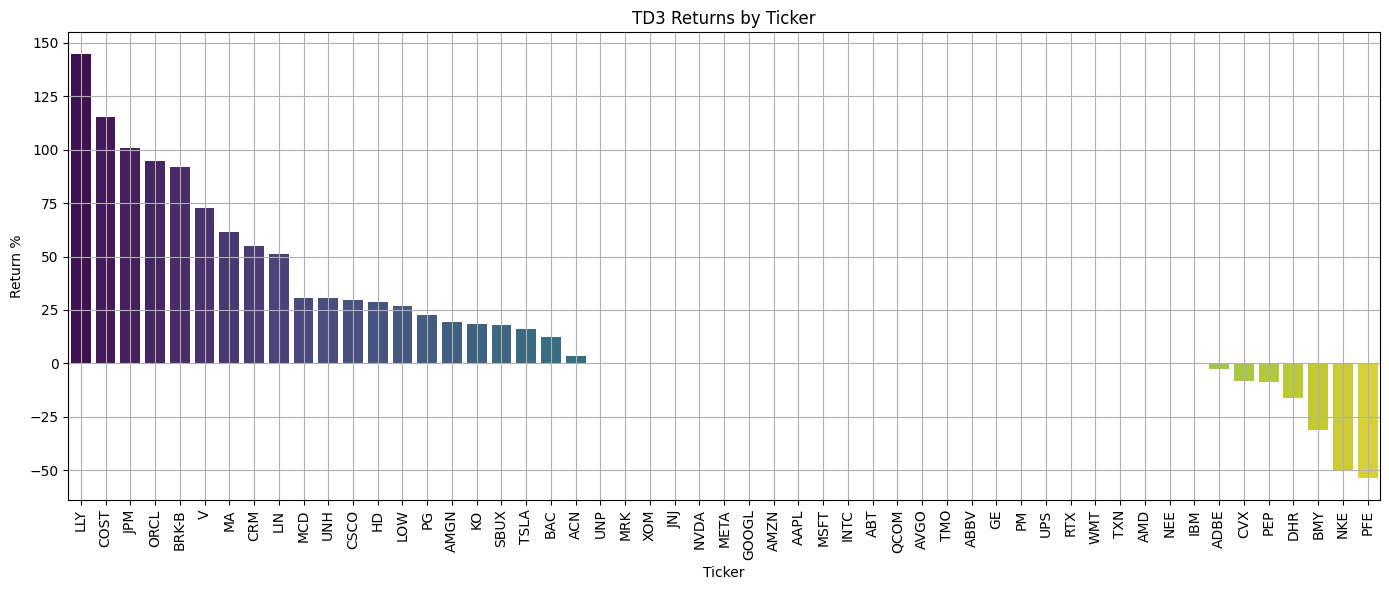

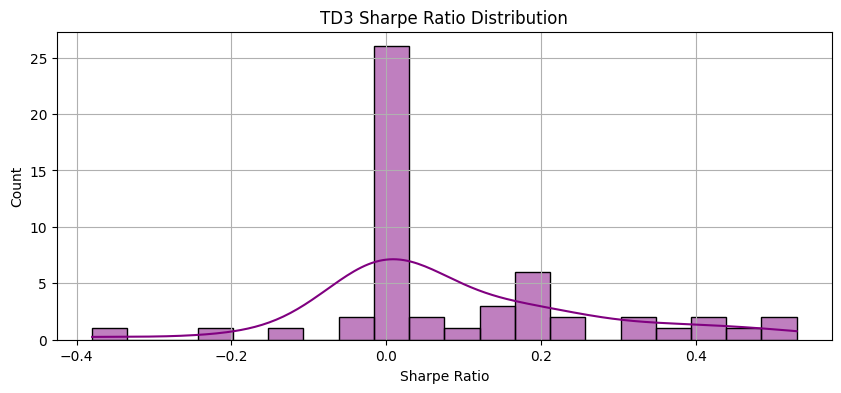

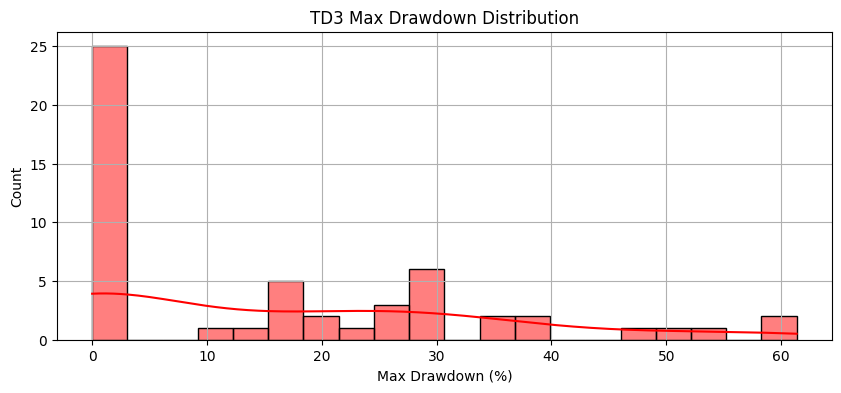

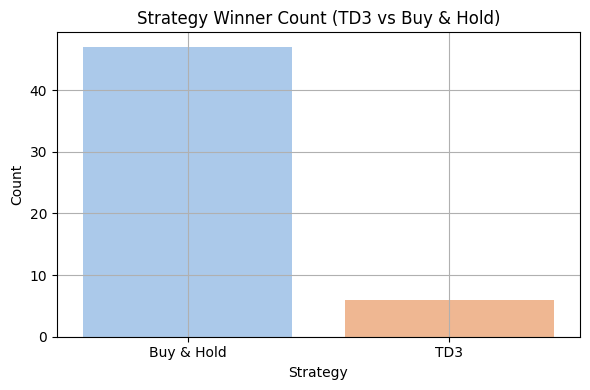

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Load TD3 Results
td3_results = pd.read_csv("td3_multi_stock_results.csv")

#Sort by Return %
td3_results = td3_results.sort_values(by="Return %", ascending=False)

#=== Summary Stats ===
print("\nTD3 Summary Stats")
print(td3_results.describe())

#=== Top 10 Stocks ===
print("\nTop 10 TD3 Stocks by Return %")
print(td3_results.head(10)[["Ticker", "Return %", "Sharpe", "Max DD %", "Winner"]])

#=== Bottom 10 Stocks ===
print("\nBottom 10 TD3 Stocks by Return %")
print(td3_results.tail(10)[["Ticker", "Return %", "Sharpe", "Max DD %", "Winner"]])

#=== Plot 1: Bar Chart of Returns
plt.figure(figsize=(14, 6))
sns.barplot(data=td3_results, x="Ticker", y="Return %", palette="viridis")
plt.xticks(rotation=90)
plt.title("TD3 Returns by Ticker")
plt.grid(True)
plt.tight_layout()
plt.show()

#Plot 2: Sharpe Ratio Distribution
plt.figure(figsize=(10, 4))
sns.histplot(td3_results["Sharpe"], bins=20, kde=True, color="purple")
plt.title("TD3 Sharpe Ratio Distribution")
plt.xlabel("Sharpe Ratio")
plt.grid(True)
plt.show()

#Plot 3: Max Drawdown Distribution
plt.figure(figsize=(10, 4))
sns.histplot(td3_results["Max DD %"], bins=20, kde=True, color="red")
plt.title("TD3 Max Drawdown Distribution")
plt.xlabel("Max Drawdown (%)")
plt.grid(True)
plt.show()

#Plot 4: Win Count Comparison (Fixed for seaborn warning)
win_counts = td3_results["Winner"].value_counts().reset_index()
win_counts.columns = ["Strategy", "Count"]

plt.figure(figsize=(6, 4))
sns.barplot(data=win_counts, x="Strategy", y="Count", hue="Strategy", palette="pastel", legend=False)
plt.title("Strategy Winner Count (TD3 vs Buy & Hold)")
plt.ylabel("Count")
plt.grid(True)
plt.tight_layout()
plt.show()

#Export Top/Bottom Tickers
td3_results.head(10).to_csv("td3_top_10.csv", index=False)
td3_results.tail(10).to_csv("td3_bottom_10.csv", index=False)